# Check CSVs file to check the result

In [8]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plot
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import seaborn as sns
import re

FPS = 15

In [9]:
CSVs = glob.glob('./results/*.csv')
CSVs

['./results\\10-10-2024_06-56-26_track_246_cam_0.avi_track_242_cam_3.avi.csv',
 './results\\10-10-2024_07-14-32_track_248_cam_0.avi_track_247_cam_4.avi.csv',
 './results\\10-10-2024_07-50-59_track_251_cam_0.avi_track_249_cam_5.avi.csv',
 './results\\10-10-2024_08-25-21_track_257_cam_0.avi_track_252_cam_8.avi.csv',
 './results\\10-10-2024_08-31-27_track_262_cam_0.avi_track_258_cam_9.avi.csv',
 './results\\10-10-2024_08-57-19_track_273_cam_0.avi_track_263_cam_11.avi.csv',
 './results\\10-10-2024_08-58-04_track_274_cam_0.avi_track_274_cam_12.avi.csv',
 './results\\10-10-2024_09-02-35_track_275_cam_0.avi_track_275_cam_13.avi.csv',
 './results\\10-10-2024_09-36-02_track_284_cam_0.avi_track_280_cam_15.avi.csv',
 './results\\10-10-2024_09-43-42_track_287_cam_0.avi_track_285_cam_16.avi.csv',
 './results\\10-10-2024_10-31-25_track_308_cam_0.avi_track_307_cam_26.avi.csv',
 './results\\10-10-2024_10-34-38_track_311_cam_0.avi_track_309_cam_27.avi.csv',
 './results\\10-10-2024_16-36-18_track_416_ca

['10-10-2024_09-02-35_track_275_cam_0.png']


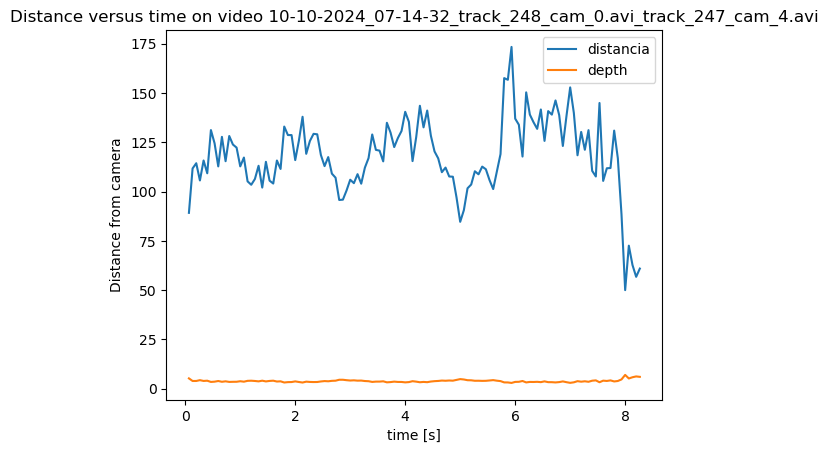

In [10]:
# Show the distance over time for a tracked bird
CSV = CSVs[1] # choose a CSV file


dfDistance = pd.read_csv(CSV)

for track_id in dfDistance['track_id'].unique():
    bMask = dfDistance['track_id']==track_id
    bird_distances = dfDistance[bMask]['bird_distance']
    bird_depths = dfDistance[bMask]['bird_Depth']
    time = dfDistance[bMask]['current_frame']/FPS
    # distance for depth = 125


    print(dfDistance['ref_circles'].unique())
    # print(bird_distances)
    plot.plot(time,bird_distances)
    plot.plot(time,bird_depths)
    # plot.plot(time, vector_distance125)
    plot.legend(["distancia","depth","125 depth"])
    plot.xlabel('time [s]')
    plot.ylabel('Distance from camera')
    plot.title("Distance versus time on video " + CSV.split('\\')[-1][:-4])
    plot.show()

## Metrics for Linear regression
| Metric | Explanation                                                   |
|:-------|:--------------------------------------------------------------|
| **RMSE**   | Root Mean Squared Error. Typical size of prediction errors (m). |
| **MAE**    | Mean Absolute Error. Average absolute error between prediction and ground truth (m). |
| **R²**     | Coefficient of determination. Fraction of variance explained (0–1). |
| **σ**      | Standard deviation of residuals. Spread of errors around zero (m). |



In [11]:
import os
import glob, re

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

FPS = 15

def parse_ref_values(track_row):
    depths = [d[0] for d in eval(track_row['ref_depth_values'].replace('\n',','))]
    distances = eval(
        str(re.sub(r'\s+| ',',', track_row['ref_distance_values']))
            .replace('[,','[')
    )
    return np.array(depths), np.array(distances)

def fit_depth_to_distance_models(df):
    coefs_metrics = {}
    for i, row in df.iterrows():
        dpths, dists = parse_ref_values(row)
        dpths = 1/dpths      
        X = dpths.reshape(-1,1)
        y = dists
        reg = LinearRegression().fit(X, y)
        

        # check metrics:
        y_pred = reg.predict(X)
        rmse, mae, r2, sigma = compute_regression_metrics(y, y_pred)
        coefs_metrics[i] = (float(reg.coef_[0]), float(reg.intercept_),rmse, mae, r2, sigma)
    return coefs_metrics

def compute_regression_metrics(y_true, y_pred):
    y_true = np.ravel(y_true); y_pred = np.ravel(y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae  = mean_absolute_error(y_true, y_pred)
    r2   = r2_score(y_true, y_pred) if y_true.size >= 2 else np.nan
    sigma = np.std(y_true - y_pred)
    return rmse, mae, r2, sigma

# fit_depth_to_distance_models(df)

summary = []
for csv_path in glob.glob('./results/*.csv'):
    if csv_path != glob.glob('./results/*.csv')[-1]:
        continue
    df = pd.read_csv(csv_path)
    df['time_s'] = df['current_frame'] / FPS


    # Fit depth→distance per track
    d2d_coefs = fit_depth_to_distance_models(df)
    coef_df = (
        pd.DataFrame.from_dict(d2d_coefs, orient='index', columns=['a','b','RMSE','MAE','R2','σ'])
            .reset_index().rename(columns={'index':'track_id'})
    )

    # print(df)
    df = df.merge(coef_df, left_index=True, right_index=True,how='left')
    df['bird_distance'] = df['a'] * (1/df['bird_Depth']) + df['b']
    # filtrate out invalid depth values
    df = df[df['bird_Depth']>0]
    if len(df) == 0:
        print(f"Skipping {csv_path} because it has no valid depth values")
        continue

    break



Olhar aqui Marcao

train text split 

for em cada linha do dataframe
 - 


In [12]:
from sklearn.model_selection import ShuffleSplit
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np

csv_paths = glob.glob('./results/*.csv')
csv_path = csv_paths[6]  # Choose a CSV file
df = pd.read_csv(csv_path)

VALIDADATE_ON_ALL_VALUES = False
# Set up repeated train/test splits (e.g., 10 splits, 80% train, 20% test)
n_splits = 10
test_size = 0.2
random_state = 42

splitter = ShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=random_state)

# Store metrics for each row and their train/test indices
row_metrics_list = []
row_train_idx = {}
row_test_idx = {}


# Treina em cada Frame
for i, row in df.iterrows():
    depths, distances = parse_ref_values(row)
    X_row = (1 / np.array(depths)).reshape(-1, 1)
    y_row = np.array(distances)
    
    # Split for this row
    split_metrics = []
    train_indices_list = []
    test_indices_list = []
    for split_idx, (train_indices, test_indices) in enumerate(splitter.split(X_row)):
        if len(train_indices) < 2 or len(test_indices) == 0:
            continue
        reg_row = LinearRegression().fit(X_row[train_indices], y_row[train_indices])
        if VALIDADATE_ON_ALL_VALUES:
            test_indices = range(len(X_row))  # Use all values for validation
        y_pred_row = reg_row.predict(X_row[test_indices])
        rmse, mae, r2, sigma = compute_regression_metrics(y_row[test_indices], y_pred_row)
        split_metrics.append({'row': i, 'split': split_idx, 'coef': float(reg_row.coef_[0]), 'intercept': float(reg_row.intercept_),
                            'RMSE': rmse, 'MAE': mae, 'R2': r2, 'sigma': sigma})
        train_indices_list.append(train_indices)
        test_indices_list.append(test_indices)
    row_metrics_list.append(split_metrics)
    row_train_idx[i] = train_indices_list
    row_test_idx[i] = test_indices_list

# Average per-row metrics
all_splits = [item for sublist in row_metrics_list for item in sublist]
row_metrics_df = pd.DataFrame(all_splits)
row_avg = row_metrics_df.groupby('row').mean(numeric_only=True)
# print("Per-row regression metrics (average over splits):")
# print(row_avg)


# Treina no conjunto completo = Utiliza todos os frames para achar a 
# regressão linear
# Cmbined Linear Regression

num_split = 0
# for n_split in range(n_splits):
X_all_train, y_all_train, X_all_test, y_all_test = [], [], [], []
X_all, y_all = [], []
for idx, row in df.iterrows():
    depths, distances = parse_ref_values(row)
    X_row = (1 / np.array(depths)).reshape(-1, 1)
    y_row = np.array(distances)
    
    train_indices_list = row_train_idx.get(idx, [])
    test_indices_list = row_test_idx.get(idx, [])
    
    # Iterate through the list of train/test indices
    
    train_indices = train_indices_list[num_split]
    X_all_train.extend(X_row[train_indices])
    y_all_train.extend(y_row[train_indices])
        
    test_indices =  test_indices_list[num_split]
    X_all_test.extend(X_row[test_indices])
    y_all_test.extend(y_row[test_indices])

    X_all.extend(X_row)
    y_all.extend(y_row)
# Convert to numpy arrays
X_all_train = np.array(X_all_train)
y_all_train = np.array(y_all_train)
X_all_test = np.array(X_all_test)
y_all_test = np.array(y_all_test)

# Perform combined regression if there's enough data
if len(X_all_train) > 0 and len(X_all_test) > 0:
    reg_all = LinearRegression().fit(X_all_train, y_all_train)
    if VALIDADATE_ON_ALL_VALUES:
        y_pred_all = reg_all.predict(X_all)
        y_all_test = y_all
    else:
        y_pred_all = reg_all.predict(X_all_test)
    rmse_all, mae_all, r2_all, sigma_all = compute_regression_metrics(y_all_test, y_pred_all)

In [13]:
print("Number of rows:", len(df))
if VALIDADATE_ON_ALL_VALUES:
        print("Validation on all set")
else:
        print("Validation on test set")
        
# print("\nCombined regression metrics:")
# print(pd.DataFrame({'coef': [reg_all.coef_[0]], 'intercept': [reg_all.intercept_],
#         'RMSE': [rmse_all], 'MAE': [mae_all], 'R2': [r2_all], 'sigma': [sigma_all]}).to_markdown())

# Combined Average per-row metrics
all_splits = [item for sublist in row_metrics_list for item in sublist]
row_metrics_df = pd.DataFrame(all_splits)
row_avg = row_metrics_df.groupby(lambda x: True).mean(numeric_only=True)
row_avg.drop(columns=['row','split'], inplace=True)
print("\nRegression metrics (average over all train_test splits and frames): ")
print(row_avg.to_markdown())

row_max = row_metrics_df.groupby('row').mean(numeric_only=True).groupby(lambda x: True).max(numeric_only=True)
row_max.drop(columns=['split'], inplace=True)
print("\nRegression metrics (max over all average train_test splits): ")
print(row_max.to_markdown())

row_min = row_metrics_df.groupby('row').mean(numeric_only=True).groupby(lambda x: True).min(numeric_only=True)
row_min.drop(columns=['split'], inplace=True)
print("\nRegression metrics (min over averga all train_test splits): ")
print(row_min.to_markdown())


# Check each frame with combined regression
row_metrics = []
for idx, row in df.iterrows():
    depths, distances = parse_ref_values(row)
    X_row = (1 / np.array(depths)).reshape(-1, 1)
    y_row = np.array(distances)
    
    # Get the train/test indices for this row and split
    train_indices_list = row_train_idx.get(idx, [])
    test_indices_list = row_test_idx.get(idx, [])

    train_indices = train_indices_list[num_split]
    X_row[train_indices]
    y_row[train_indices]
        
    test_indices =  test_indices_list[num_split]
    y_row[test_indices]
    # Predict using the combined regression model
    if VALIDADATE_ON_ALL_VALUES:
        y_pred_row = reg_all.predict(X_row)
        rmse, mae, r2, sigma = compute_regression_metrics(y_row, y_pred_row)
    else:
        y_pred_row = reg_all.predict(X_row[test_indices])
        rmse, mae, r2, sigma = compute_regression_metrics(y_row[test_indices], y_pred_row)
    row_metrics.append({'row': idx, 'split': num_split, 'RMSE': rmse, 'MAE': mae, 'R2': r2, 'sigma': sigma})
row_metrics_df = pd.DataFrame(row_metrics)

print("\n------------ COMBINED LINEAR REGRESSION")

avg_metric = row_metrics_df.groupby(lambda x: True).mean(numeric_only=True)
max_metric = row_metrics_df.groupby(lambda x: True).max(numeric_only=True)
min_metric = row_metrics_df.groupby(lambda x: True).min(numeric_only=True)
print("\nCombined regression metrics:")
print(pd.DataFrame({'coef': [reg_all.coef_[0]], 'intercept': [reg_all.intercept_],
        'RMSE': [rmse_all], 'MAE': [mae_all], 'R2': [r2_all], 'sigma': [sigma_all]}).to_markdown())

print("\nRegression metrics for combined regression (average over all frames): ")
print(avg_metric.to_markdown())

print("\nRegression metrics for combined regression (max over all frames): ")
print(max_metric.to_markdown())

print("\nRegression metrics for combined regression (min over all frames): ")
print(min_metric.to_markdown())


Number of rows: 70
Validation on test set

Regression metrics (average over all train_test splits and frames): 
|      |    coef |   intercept |    RMSE |    MAE |       R2 |   sigma |
|:-----|--------:|------------:|--------:|-------:|---------:|--------:|
| True | 330.049 |     15.8384 | 18.9004 | 15.241 | 0.888005 | 14.5715 |

Regression metrics (max over all average train_test splits): 
| row   |   coef |   intercept |    RMSE |     MAE |       R2 |   sigma |
|:------|-------:|------------:|--------:|--------:|---------:|--------:|
| True  | 375.79 |     44.7168 | 49.9209 | 38.3959 | 0.975571 | 41.4566 |

Regression metrics (min over averga all train_test splits): 
| row   |    coef |   intercept |    RMSE |   MAE |       R2 |   sigma |
|:------|--------:|------------:|--------:|------:|---------:|--------:|
| True  | 236.104 |     2.33252 | 8.61416 | 7.063 | 0.343826 | 5.98802 |

------------ COMBINED LINEAR REGRESSION

Combined regression metrics:
|    |    coef |   intercept |  

In [16]:
print("\nRegression metrics (average over all train_test splits and frames): ")
print(row_avg.to_latex())
print("\nRegression metrics for combined regression (average over all frames): ")
print(avg_metric.to_latex())



Regression metrics (average over all train_test splits and frames): 
\begin{tabular}{lrrrrrr}
\toprule
 & coef & intercept & RMSE & MAE & R2 & sigma \\
\midrule
True & 330.048558 & 15.838397 & 18.900399 & 15.241024 & 0.888005 & 14.571502 \\
\bottomrule
\end{tabular}


Regression metrics for combined regression (average over all frames): 
\begin{tabular}{lrrrrrr}
\toprule
 & row & split & RMSE & MAE & R2 & sigma \\
\midrule
True & 34.500000 & 0.000000 & 29.488701 & 25.066836 & 0.910209 & 27.448309 \\
\bottomrule
\end{tabular}



In [14]:

# def main():
summary = []
for csv_path in glob.glob('./results/*.csv'):
    df = pd.read_csv(csv_path)
    df['time_s'] = df['current_frame'] / FPS

    # Fit depth→distance per track
    d2d_coefs, d2d_rmse, d2d_mae, d2d_r2, d2d_sigma = fit_depth_to_distance_models(df)
    coef_df = (
        pd.DataFrame.from_dict(d2d_coefs, orient='index', columns=['a','b','RMSE','MAE','R2','σ'])
            .reset_index().rename(columns={'index':'track_id'})
    )
    df = df.merge(coef_df, on='track_id', how='left')
    df = df[df['bird_Depth']>0]
    df['pred_d2d'] = df['a'] * (1/df['bird_Depth']) + df['b']
    metrics_d, metrics_t = [], []

    # Per-track: metrics & plots
    for track_id, sub in df.groupby('track_id'):
        if len(sub) < 2:
            print(f"Track {track_id}: only {len(sub)} sample(s), skipping.")
            continue

        t = sub['time_s'].values.reshape(-1,1)
        y = sub['bird_distance'].values
        y_d = sub['pred_d2d'].values

        rmse_d, mae_d, r2_d, σ_d = compute_regression_metrics(y, y_d)
        metrics_d.append((rmse_d, mae_d, r2_d, σ_d))

        reg_t = LinearRegression().fit(t, y)
        y_t = reg_t.predict(t)
        rmse_t, mae_t, r2_t, σ_t = compute_regression_metrics(y, y_t)
        metrics_t.append((rmse_t, mae_t, r2_t, σ_t))

        # Plot
        bplot = False
        if bplot:
            plt.figure(figsize=(6,4))
            plt.scatter(t, y, s=20, label='Measured')
            plt.plot(t, y_d, '--', label='Depth→Distance')
            plt.plot(t, y_t, '-',  label='Time→Distance')
            plt.xlabel('Time [s]')
            plt.ylabel('Distance [m]')
            plt.title(f"{os.path.basename(csv_path)[:-4]} · Track {track_id}")
            plt.legend()
            plt.ylim(0, max(y.max(), y_d.max(), y_t.max())*1.1)
            plt.tight_layout()
            plt.show()

    # Compute per-file averages
    if metrics_d:
        avg_d = np.vstack(metrics_d).mean(axis=0)
        avg_t = np.vstack(metrics_t).mean(axis=0)
    else:
        avg_d = avg_t = (np.nan,)*4

    summary.append({
        'file': os.path.basename(csv_path),
        'RMSE_d': avg_d[0], 'MAE_d': avg_d[1], 'R2_d': avg_d[2], 'σ_d': avg_d[3],
        'RMSE_t': avg_t[0], 'MAE_t': avg_t[1], 'R2_t': avg_t[2], 'σ_t': avg_t[3]
    })

# Build summary table and add global average row
df_sum = pd.DataFrame(summary)
global_avg = df_sum.drop(columns='file').mean(numeric_only=True)
global_avg['file'] = 'AVERAGE'
df_sum = pd.concat([df_sum, global_avg.to_frame().T], ignore_index=True)

# Save the errors summary to a CSV file
#df_sum.to_csv('model_errors.csv', index=False)

# Print Markdown table
print(df_sum.to_markdown(index=False, floatfmt=".3f"))



ValueError: not enough values to unpack (expected 5, got 4)

In [ ]:
import os
import glob, re

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, HuberRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

FPS = 15

def parse_ref_values(track_row):
    depths = [d[0] for d in eval(track_row['ref_depth_values'].replace('\n',','))]
    distances = eval(
        str(re.sub(r'\s+| ',',', track_row['ref_distance_values']))
            .replace('[,','[')
    )
    return np.array(depths), np.array(distances)

def compute_regression_metrics(y_true, y_pred):
    y_true = np.ravel(y_true);  y_pred = np.ravel(y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae  = mean_absolute_error(y_true, y_pred)
    r2   = r2_score(y_true, y_pred) if y_true.size >= 2 else np.nan
    sigma = np.std(y_true - y_pred)
    return rmse, mae, r2, sigma

def main():
    summary = []

    for csv_path in glob.glob('./results/*.csv'):
        df = pd.read_csv(csv_path)
        df['time_s'] = df['current_frame'] / FPS
        
        # Ignore the rows when its "ignore" value is 1
        df = df[df['ignore'] != 1] # Added this line to filter the DataFrame       


        # Will accumulate per-track metrics for each model
        md_lin = []   # depth-linear
        md_hub = []   # depth-poly-huber
        mt_lin = []   # time-linear
        mt_hub = []   # time-poly-huber

        for track_id, sub in df.groupby('track_id'):
            # Gather measurement
            if len(sub) < 2:
                continue
            t = sub['time_s'].values.reshape(-1,1)
            y = sub['bird_distance'].values

            # — 1) Depth-Linear
            Z = sub['bird_Depth'].values.reshape(-1,1)
            mdl = LinearRegression().fit(Z, y)
            y_dl = mdl.predict(Z)
            md_lin.append(compute_regression_metrics(y, y_dl))

            # — 2) Depth-Poly-Huber
            md_h = make_pipeline(
                StandardScaler(),
                PolynomialFeatures(degree=2, include_bias=False),
                HuberRegressor(epsilon=1.35, max_iter=5000, tol=1e-4)
            )
            md_h.fit(Z, y)
            y_dh = md_h.predict(Z)
            md_hub.append(compute_regression_metrics(y, y_dh))

            # — 3) Time-Linear
            mtl = LinearRegression().fit(t, y)
            y_tl = mtl.predict(t)
            mt_lin.append(compute_regression_metrics(y, y_tl))

            # — 4) Time-Poly-Huber
            mt_h = make_pipeline(
                StandardScaler(),
                PolynomialFeatures(degree=2, include_bias=False),
                HuberRegressor(epsilon=1.35, max_iter=5000, tol=1e-4)
            )
            mt_h.fit(t, y)
            y_th = mt_h.predict(t)
            mt_hub.append(compute_regression_metrics(y, y_th))

            bPlot = False
            if bPlot:
                # — Plot all four fits
                fig, ax = plt.subplots(figsize=(9,4))

                # Plot the data and fits
                ax.scatter(t, y  ,       s=30, c='C0', edgecolor='k', label='Measured distances')
                ax.plot(   t, y_dl, '--', c='C1', linewidth=2, label='Depth – Linear')
                ax.plot(   t, y_dh, '-.', c='C2', linewidth=2, label='Depth – Quadratic + Huber')
                ax.plot(   t, y_tl, ':',  c='C3', linewidth=2, label='Time – Linear')
                ax.plot(   t, y_th, '-',  c='C4', linewidth=2, label='Time – Quadratic + Huber')

                ax.set_xlabel('Time [s]')
                ax.set_ylabel('Distance [m]')
                ax.set_title(f"{os.path.basename(csv_path)[:-4]} · Track {track_id}")

                # Shrink the axes width to 80% of original, to make room on the right
                box = ax.get_position()
                ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

                # Put the legend to the right of the axes, in its own space
                ax.legend(loc='center left',
                        bbox_to_anchor=(1.02, 0.5),
                        borderaxespad=0,
                        title='Series',
                        fontsize=9,
                        title_fontsize=10)

                plt.show()

        # Compute per-file averages for each model
        def avg(metrics_list):
            return np.vstack(metrics_list).mean(axis=0) if metrics_list else (np.nan,)*4

        avg_dl = avg(md_lin)
        avg_dh = avg(md_hub)
        avg_tl = avg(mt_lin)
        avg_th = avg(mt_hub)

        summary.append({
            'file': os.path.basename(csv_path),
            'RMSE_d_lin': avg_dl[0], 'MAE_d_lin': avg_dl[1], 'R2_d_lin': avg_dl[2], 'σ_d_lin': avg_dl[3],
            'RMSE_d_hub': avg_dh[0], 'MAE_d_hub': avg_dh[1], 'R2_d_hub': avg_dh[2], 'σ_d_hub': avg_dh[3],
            'RMSE_t_lin': avg_tl[0], 'MAE_t_lin': avg_tl[1], 'R2_t_lin': avg_tl[2], 'σ_t_lin': avg_tl[3],
            'RMSE_t_hub': avg_th[0], 'MAE_t_hub': avg_th[1], 'R2_t_hub': avg_th[2], 'σ_t_hub': avg_th[3],
        })

    # Build final table with global average
    df_sum = pd.DataFrame(summary)
    globals_ = df_sum.drop(columns='file').mean(numeric_only=True)
    globals_['file'] = 'AVERAGE'
    df_sum = pd.concat([df_sum, globals_.to_frame().T], ignore_index=True)

    # — Save the full set of metrics to CSV for later reuse
    df_sum.to_csv('model_errors.csv', index=False)
    print("Wrote model_errors.csv")

    print(df_sum.to_markdown(index=False, floatfmt=".3f"))


if __name__ == "__main__":
    main()



Wrote model_errors.csv
| file                                                             |   RMSE_d_lin |   MAE_d_lin |   R2_d_lin |   σ_d_lin |   RMSE_d_hub |   MAE_d_hub |   R2_d_hub |   σ_d_hub |   RMSE_t_lin |   MAE_t_lin |   R2_t_lin |   σ_t_lin |   RMSE_t_hub |   MAE_t_hub |   R2_t_hub |   σ_t_hub |
|:-----------------------------------------------------------------|-------------:|------------:|-----------:|----------:|-------------:|------------:|-----------:|----------:|-------------:|------------:|-----------:|----------:|-------------:|------------:|-----------:|----------:|
| 10-10-2024_06-56-26_track_246_cam_0.avi_track_242_cam_3.avi.csv  |      nan     |     nan     |    nan     |   nan     |      nan     |     nan     |    nan     |   nan     |      nan     |     nan     |    nan     |   nan     |      nan     |     nan     |    nan     |   nan     |
| 10-10-2024_07-14-32_track_248_cam_0.avi_track_247_cam_4.avi.csv  |        6.986 |       6.121 |      0.971 |     6.986 |

## ------------------ Other models

| Legend label                  | Description                                                                                                                     |
|:------------------------------|:--------------------------------------------------------------------------------------------------------------------------------|
| **Measured distances**        | Blue markers: raw `bird_distance` ground-truth from the CSV.                                                                   |
| **Depth – Linear Regression** | Ordinary least squares \(d = a\,z + b\). Fast but assumes perfect linearity and is sensitive to outliers.                     |
| **Depth – Quadratic + Huber** | Polynomial + Huber: \(d = a_2z^2 + a_1z + a_0\) fitted with Huber loss** (quadratic if \(|r|\le\delta\), linear if \(|r|>\delta\)). |
| **Time – Linear Regression**  | Constant‐speed model \(d = v_0 + v_1\,t\). Cannot capture acceleration or errant frames.                                       |
| **Time – Quadratic + Huber**  | Polynomial + Huber: \(d = p_2t^2 + p_1t + p_0\) with the same robust Huber loss to tolerate frame outliers.                    |


** The Huber loss behaves like squared‐error for small residuals but switches to absolute‐error for large ones—so any calibration points with very large errors (outliers) only pull on the fit line proportionally, rather than quadratically. This makes the model both flexible (via the quadratic term) and robust (via Huber’s outlier down-weighting).


In [ ]:
import pandas as pd
from IPython.display import Markdown, display

# 1) Read the wide-format CSV
wide = pd.read_csv('model_errors.csv')

# 2) Melt it into long format, one row per (file, model)
mappings = [
    ('Depth – Linear',            'd_lin'),
    ('Depth – Quadratic + Huber', 'd_hub'),
    ('Time – Linear',             't_lin'),
    ('Time – Quadratic + Huber',  't_hub'),
]


records = []
for label, prefix in mappings:
    dfm = wide[[
        'file',
        f'RMSE_{prefix}',
        f'MAE_{prefix}',
        f'R2_{prefix}',
        f'σ_{prefix}'
    ]].copy()
    dfm.columns = ['file','RMSE','MAE','R2','sigma']
    dfm['model'] = label
    records.append(dfm)

errors_long = pd.concat(records, ignore_index=True)


# Compute mean of each metric by model
df_model_avg = (
    errors_long
      .groupby('model')[['RMSE','MAE','R2','sigma']]
      .mean()
      .reset_index()
)

# 3) Display the one‐row‐per‐method summary
print("Average of each metric by model, across all files:")
display(Markdown(df_model_avg.to_markdown(index=False, floatfmt=".3f")))

# print nice separator
print("\n" + "="*120 + "\n")

# 4) Display the full table of every file × every model
print("Errors for each model, per file (INDIVIDUALLY):")
display(Markdown(errors_long.to_markdown(index=False, floatfmt=".3f")))


Average of each metric by model, across all files:


| model                     |   RMSE |    MAE |    R2 |   sigma |
|:--------------------------|-------:|-------:|------:|--------:|
| Depth – Linear            |  1.910 |  1.559 | 0.897 |   1.910 |
| Depth – Quadratic + Huber |  1.779 |  1.441 | 0.920 |   1.777 |
| Time – Linear             | 16.147 | 14.210 | 0.649 |  16.147 |
| Time – Quadratic + Huber  |  9.977 |  7.347 | 0.762 |   9.760 |



Errors for each model, per file (INDIVIDUALLY):


| file                                                             |    RMSE |     MAE |      R2 |   sigma | model                     |
|:-----------------------------------------------------------------|--------:|--------:|--------:|--------:|:--------------------------|
| 10-10-2024_06-56-26_track_246_cam_0.avi_track_242_cam_3.avi.csv  | nan     | nan     | nan     | nan     | Depth – Linear            |
| 10-10-2024_07-14-32_track_248_cam_0.avi_track_247_cam_4.avi.csv  |   4.258 |   3.675 |   0.931 |   4.258 | Depth – Linear            |
| 10-10-2024_07-50-59_track_251_cam_0.avi_track_249_cam_5.avi.csv  |   0.000 |   0.000 |   1.000 |   0.000 | Depth – Linear            |
| 10-10-2024_08-25-21_track_257_cam_0.avi_track_252_cam_8.avi.csv  | nan     | nan     | nan     | nan     | Depth – Linear            |
| 10-10-2024_08-31-27_track_262_cam_0.avi_track_258_cam_9.avi.csv  | nan     | nan     | nan     | nan     | Depth – Linear            |
| 10-10-2024_08-57-19_track_273_cam_0.avi_track_263_cam_11.avi.csv |   1.774 |   1.297 |   0.600 |   1.774 | Depth – Linear            |
| 10-10-2024_08-58-04_track_274_cam_0.avi_track_274_cam_12.avi.csv |   1.011 |   0.799 |   0.999 |   1.011 | Depth – Linear            |
| 10-10-2024_09-02-35_track_275_cam_0.avi_track_275_cam_13.avi.csv |   2.430 |   1.965 |   0.999 |   2.430 | Depth – Linear            |
| 10-10-2024_09-36-02_track_284_cam_0.avi_track_280_cam_15.avi.csv |   2.065 |   1.708 |   0.664 |   2.065 | Depth – Linear            |
| 10-10-2024_09-43-42_track_287_cam_0.avi_track_285_cam_16.avi.csv | nan     | nan     | nan     | nan     | Depth – Linear            |
| 10-10-2024_10-31-25_track_308_cam_0.avi_track_307_cam_26.avi.csv |   2.681 |   2.189 |   0.998 |   2.681 | Depth – Linear            |
| 10-10-2024_10-34-38_track_311_cam_0.avi_track_309_cam_27.avi.csv | nan     | nan     | nan     | nan     | Depth – Linear            |
| 10-10-2024_16-36-18_track_416_cam_0.avi_track_345_cam_39.avi.csv | nan     | nan     | nan     | nan     | Depth – Linear            |
| 10-10-2024_17-23-50_track_456_cam_0.avi_track_455_cam_61.avi.csv | nan     | nan     | nan     | nan     | Depth – Linear            |
| 10-10-2024_17-32-01_track_467_cam_0.avi_track_460_cam_69.avi.csv |   1.063 |   0.842 |   0.985 |   1.063 | Depth – Linear            |
| AVERAGE                                                          |   1.910 |   1.559 |   0.897 |   1.910 | Depth – Linear            |
| 10-10-2024_06-56-26_track_246_cam_0.avi_track_242_cam_3.avi.csv  | nan     | nan     | nan     | nan     | Depth – Quadratic + Huber |
| 10-10-2024_07-14-32_track_248_cam_0.avi_track_247_cam_4.avi.csv  |   4.255 |   3.691 |   0.931 |   4.254 | Depth – Quadratic + Huber |
| 10-10-2024_07-50-59_track_251_cam_0.avi_track_249_cam_5.avi.csv  |   0.000 |   0.000 |   1.000 |   0.000 | Depth – Quadratic + Huber |
| 10-10-2024_08-25-21_track_257_cam_0.avi_track_252_cam_8.avi.csv  | nan     | nan     | nan     | nan     | Depth – Quadratic + Huber |
| 10-10-2024_08-31-27_track_262_cam_0.avi_track_258_cam_9.avi.csv  | nan     | nan     | nan     | nan     | Depth – Quadratic + Huber |
| 10-10-2024_08-57-19_track_273_cam_0.avi_track_263_cam_11.avi.csv |   1.348 |   1.024 |   0.728 |   1.344 | Depth – Quadratic + Huber |
| 10-10-2024_08-58-04_track_274_cam_0.avi_track_274_cam_12.avi.csv |   0.869 |   0.689 |   0.999 |   0.869 | Depth – Quadratic + Huber |
| 10-10-2024_09-02-35_track_275_cam_0.avi_track_275_cam_13.avi.csv |   2.381 |   1.803 |   0.999 |   2.381 | Depth – Quadratic + Huber |
| 10-10-2024_09-36-02_track_284_cam_0.avi_track_280_cam_15.avi.csv |   1.866 |   1.419 |   0.716 |   1.851 | Depth – Quadratic + Huber |
| 10-10-2024_09-43-42_track_287_cam_0.avi_track_285_cam_16.avi.csv | nan     | nan     | nan     | nan     | Depth – Quadratic + Huber |
| 10-10-2024_10-31-25_track_308_cam_0.avi_track_307_cam_26.avi.csv |   2.681 |   2.190 |   0.998 |   2.681 | Depth – Quadratic + Huber |
| 10-10-2024_10-34-38_track_311_cam_0.avi_track_309_cam_27.avi.csv | nan     | nan     | nan     | nan     | Depth – Quadratic + Huber |
| 10-10-2024_16-36-18_track_416_cam_0.avi_track_345_cam_39.avi.csv | nan     | nan     | nan     | nan     | Depth – Quadratic + Huber |
| 10-10-2024_17-23-50_track_456_cam_0.avi_track_455_cam_61.avi.csv | nan     | nan     | nan     | nan     | Depth – Quadratic + Huber |
| 10-10-2024_17-32-01_track_467_cam_0.avi_track_460_cam_69.avi.csv |   0.835 |   0.711 |   0.991 |   0.834 | Depth – Quadratic + Huber |
| AVERAGE                                                          |   1.779 |   1.441 |   0.920 |   1.777 | Depth – Quadratic + Huber |
| 10-10-2024_06-56-26_track_246_cam_0.avi_track_242_cam_3.avi.csv  | nan     | nan     | nan     | nan     | Time – Linear             |
| 10-10-2024_07-14-32_track_248_cam_0.avi_track_247_cam_4.avi.csv  |  15.963 |  12.920 |   0.031 |  15.963 | Time – Linear             |
| 10-10-2024_07-50-59_track_251_cam_0.avi_track_249_cam_5.avi.csv  |   0.000 |   0.000 |   1.000 |   0.000 | Time – Linear             |
| 10-10-2024_08-25-21_track_257_cam_0.avi_track_252_cam_8.avi.csv  | nan     | nan     | nan     | nan     | Time – Linear             |
| 10-10-2024_08-31-27_track_262_cam_0.avi_track_258_cam_9.avi.csv  | nan     | nan     | nan     | nan     | Time – Linear             |
| 10-10-2024_08-57-19_track_273_cam_0.avi_track_263_cam_11.avi.csv |   6.668 |   5.452 |   0.678 |   6.668 | Time – Linear             |
| 10-10-2024_08-58-04_track_274_cam_0.avi_track_274_cam_12.avi.csv |  17.216 |  14.484 |   0.659 |  17.216 | Time – Linear             |
| 10-10-2024_09-02-35_track_275_cam_0.avi_track_275_cam_13.avi.csv |  36.946 |  33.322 |   0.711 |  36.946 | Time – Linear             |
| 10-10-2024_09-36-02_track_284_cam_0.avi_track_280_cam_15.avi.csv |  20.853 |  17.907 |   0.423 |  20.853 | Time – Linear             |
| 10-10-2024_09-43-42_track_287_cam_0.avi_track_285_cam_16.avi.csv | nan     | nan     | nan     | nan     | Time – Linear             |
| 10-10-2024_10-31-25_track_308_cam_0.avi_track_307_cam_26.avi.csv |  30.278 |  28.546 |   0.707 |  30.278 | Time – Linear             |
| 10-10-2024_10-34-38_track_311_cam_0.avi_track_309_cam_27.avi.csv | nan     | nan     | nan     | nan     | Time – Linear             |
| 10-10-2024_16-36-18_track_416_cam_0.avi_track_345_cam_39.avi.csv | nan     | nan     | nan     | nan     | Time – Linear             |
| 10-10-2024_17-23-50_track_456_cam_0.avi_track_455_cam_61.avi.csv | nan     | nan     | nan     | nan     | Time – Linear             |
| 10-10-2024_17-32-01_track_467_cam_0.avi_track_460_cam_69.avi.csv |   1.251 |   1.045 |   0.980 |   1.251 | Time – Linear             |
| AVERAGE                                                          |  16.147 |  14.210 |   0.649 |  16.147 | Time – Linear             |
| 10-10-2024_06-56-26_track_246_cam_0.avi_track_242_cam_3.avi.csv  | nan     | nan     | nan     | nan     | Time – Quadratic + Huber  |
| 10-10-2024_07-14-32_track_248_cam_0.avi_track_247_cam_4.avi.csv  |  15.163 |  12.570 |   0.125 |  15.133 | Time – Quadratic + Huber  |
| 10-10-2024_07-50-59_track_251_cam_0.avi_track_249_cam_5.avi.csv  |   0.000 |   0.000 |   1.000 |   0.000 | Time – Quadratic + Huber  |
| 10-10-2024_08-25-21_track_257_cam_0.avi_track_252_cam_8.avi.csv  | nan     | nan     | nan     | nan     | Time – Quadratic + Huber  |
| 10-10-2024_08-31-27_track_262_cam_0.avi_track_258_cam_9.avi.csv  | nan     | nan     | nan     | nan     | Time – Quadratic + Huber  |
| 10-10-2024_08-57-19_track_273_cam_0.avi_track_263_cam_11.avi.csv |   7.678 |   4.161 |   0.651 |   6.773 | Time – Quadratic + Huber  |
| 10-10-2024_08-58-04_track_274_cam_0.avi_track_274_cam_12.avi.csv |  12.003 |   8.202 |   0.834 |  11.676 | Time – Quadratic + Huber  |
| 10-10-2024_09-02-35_track_275_cam_0.avi_track_275_cam_13.avi.csv |  26.934 |  21.140 |   0.846 |  26.834 | Time – Quadratic + Huber  |
| 10-10-2024_09-36-02_track_284_cam_0.avi_track_280_cam_15.avi.csv |  16.860 |  11.705 |   0.657 |  16.488 | Time – Quadratic + Huber  |
| 10-10-2024_09-43-42_track_287_cam_0.avi_track_285_cam_16.avi.csv | nan     | nan     | nan     | nan     | Time – Quadratic + Huber  |
| 10-10-2024_10-31-25_track_308_cam_0.avi_track_307_cam_26.avi.csv |   0.000 |   0.000 |   1.000 |   0.000 | Time – Quadratic + Huber  |
| 10-10-2024_10-34-38_track_311_cam_0.avi_track_309_cam_27.avi.csv | nan     | nan     | nan     | nan     | Time – Quadratic + Huber  |
| 10-10-2024_16-36-18_track_416_cam_0.avi_track_345_cam_39.avi.csv | nan     | nan     | nan     | nan     | Time – Quadratic + Huber  |
| 10-10-2024_17-23-50_track_456_cam_0.avi_track_455_cam_61.avi.csv | nan     | nan     | nan     | nan     | Time – Quadratic + Huber  |
| 10-10-2024_17-32-01_track_467_cam_0.avi_track_460_cam_69.avi.csv |   1.181 |   0.999 |   0.982 |   1.179 | Time – Quadratic + Huber  |
| AVERAGE                                                          |   9.977 |   7.347 |   0.762 |   9.760 | Time – Quadratic + Huber  |

['10-10-2024_09-02-35_track_275_cam_0.png']


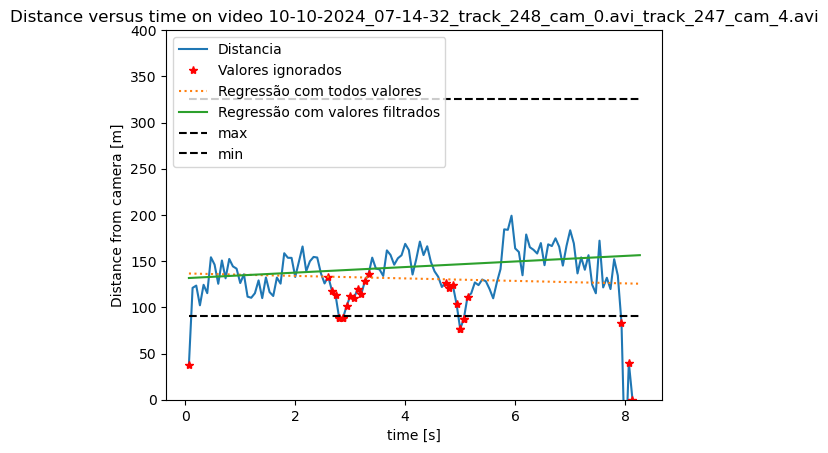

Desvio padrão: 18.91 m
Desvio padrão antigo: 39.17 m


In [ ]:
dfDistance = pd.read_csv(CSV)
# for track_id in dfDistance['track_id'].unique():
bMask = dfDistance['track_id']==track_id

mean_distance = LinearRegression()
mean_distance.fit([[t] for t in time],[[d] for d in bird_distances] )

ref_depth_values = []
ref_distance_values = []
red_ignore = []
new_distances = []
new_distances_125 = []
for i, track in dfDistance.iterrows():
    ref_depth_values.append( [aaa[0] for aaa in eval(track['ref_depth_values'].replace('\n',','))] )
    ref_distance_values.append( eval(
        str(re.sub(r'\s+| ',',',track['ref_distance_values'])).replace('[,','[')
        ))
    distanceLR = LinearRegression().fit(np.reshape(ref_depth_values[-1],(-1,1)),
                                        np.reshape(ref_distance_values[-1],(-1,1)))
    
max_distance = max([max(a) for a in ref_distance_values])
min_distance = min([min(a) for a in ref_distance_values])

    # new_distance = track['bird_Depth']*distanceLR.coef_[0] + distanceLR.intercept_
    # new_distances.append(new_distance[0])
    # new_distances_125.append(125*distanceLR.coef_[0] + distanceLR.intercept_)
    # print(track['bird_distance'], new_distance)

bMask = dfDistance['track_id']==track_id
bird_distances = dfDistance['bird_distance']
bird_depths = dfDistance[bMask]['bird_Depth']
time = dfDistance[bMask]['current_frame']/FPS
# distance for depth = 125

bMask_ignore = [True if dist>min_distance and dist<max_distance and not ig else False for (ig, dist) in zip(dfDistance['ignore'],dfDistance['bird_distance'])]
filtered_bird_distances = bird_distances[bMask_ignore]
filtered_time = time[bMask_ignore]

mean_distance_new = LinearRegression()
mean_distance_new.fit([[t] for t in filtered_time],[[d] for d in filtered_bird_distances] )


print(dfDistance['ref_circles'].unique())
# print(bird_distances)
plot.plot(time,bird_distances)
# plot.plot(time,bird_depths)
plot.plot(pd.concat([time.loc[dfDistance['ignore'].map(bool)],time.loc[bird_distances>max_distance],time.loc[bird_distances<min_distance]]),
         pd.concat([bird_distances.loc[dfDistance['ignore'].map(bool)],bird_distances.loc[bird_distances>max_distance],bird_distances.loc[bird_distances<min_distance]]),
                         'r*')
# plot.plot(time, new_distances)
# plot.plot(time, vector_distance125)
plot.plot(time, mean_distance.predict([[t] for t in time]),':')
plot.plot(time, mean_distance_new.predict([[t] for t in time]))

plot.plot(time, max_distance*np.ones(len(time)), 'k--')
plot.plot(time, min_distance*np.ones(len(time)), 'k--')
plot.legend(["Distancia",
             "Valores ignorados","Regressão com todos valores",'Regressão com valores filtrados',
             'max','min'],loc='upper left')
plot.xlabel('time [s]')
plot.ylabel('Distance from camera [m]')
plot.ylim([0,400])
plot.title("Distance versus time on video " + CSV.split('\\')[-1][:-4])
plot.show()

residuals = filtered_bird_distances - mean_distance_new.predict([[t] for t in filtered_time]).reshape(-1)
std_dev_residuals = np.std(residuals)
residuals_old = filtered_bird_distances - mean_distance.predict([[t] for t in filtered_time]).reshape(-1)
residuals_old = bird_distances - mean_distance.predict([[t] for t in time]).reshape(-1)
std_dev_residuals_old = np.std(residuals_old)
print("Desvio padrão:", round(std_dev_residuals,2), "m")
print("Desvio padrão antigo:", round(std_dev_residuals_old,2), "m")

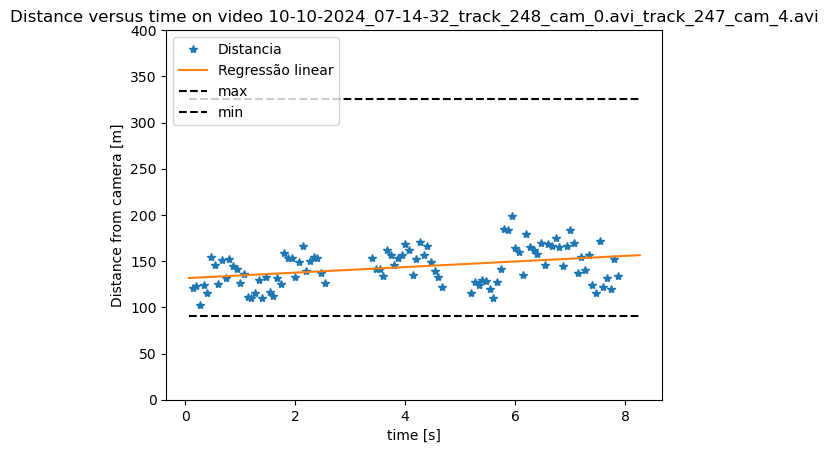

In [ ]:
plot.plot(filtered_time,filtered_bird_distances,'*')
plot.plot(time, mean_distance_new.predict([[t] for t in time]))

plot.plot(time, max_distance*np.ones(len(time)), 'k--')
plot.plot(time, min_distance*np.ones(len(time)), 'k--')
plot.legend(["Distancia",
             'Regressão linear',
             'max','min'],loc='upper left')
plot.xlabel('time [s]')
plot.ylabel('Distance from camera [m]')
plot.ylim([0,400])
plot.title("Distance versus time on video " + CSV.split('\\')[-1][:-4])
plot.show()

In [ ]:
# np.concatenate(time.loc[dfDistance['ignore'].map(bool)],
time.loc[bird_distances>max_distance]
pd.concat([time.loc[bird_distances<min_distance], time.loc[bird_distances>max_distance]]
)

0      0.066667
41     2.800000
42     2.866667
74     5.000000
75     5.066667
118    7.933333
119    8.000000
120    8.066667
121    8.133333
122    8.200000
123    8.266667
Name: current_frame, dtype: float64

In [ ]:
dfDistance.sort_values('bird_distance',ascending=False).head(2)

,Unnamed: 0,coordinates_x1,coordinates_y1,coordinates_x2,coordinates_y2,current_frame,track_id,video_file,bird_distance,bird_Depth,coefs,ref_depth_values,ref_distance_values,ref_choosen_points,ref_circles,ignore
88,88,1366.860107,524.858032,1425.249268,557.036865,89.0,134.0,10-10-2024_07-14-32_track_248_cam_0.avi_track_...,199.15594,2.917859,"[array([-61.93826], dtype=float32), 379.88306]",[[4.5554786]\n [3.6012373]\n [2.3165092]\n [2....,[ 97.03452097 132.67746731 182.81089 238.42...,[],10-10-2024_09-02-35_track_275_cam_0.png,0
86,86,1337.560791,521.164368,1396.021729,555.755188,87.0,134.0,10-10-2024_07-14-32_track_248_cam_0.avi_track_...,184.40092,3.185091,"[array([-61.661144], dtype=float32), 380.7973]",[[4.539402 ]\n [3.5691998]\n [2.3147368]\n [2....,[ 97.03452097 132.67746731 182.81089 238.42...,[],10-10-2024_09-02-35_track_275_cam_0.png,0


In [ ]:
dfDistance.columns

Index(['Unnamed: 0', 'coordinates_x1', 'coordinates_y1', 'coordinates_x2',
       'coordinates_y2', 'current_frame', 'track_id', 'video_file',
       'bird_distance', 'bird_Depth', 'coefs', 'ref_depth_values',
       'ref_distance_values', 'ref_choosen_points', 'ref_circles', 'ignore'],
      dtype='object')

In [ ]:
dsDepths = dfDistance['ref_depth_values'].map(lambda x: [aaa[0] for aaa in eval(x.replace('\n','').replace('[ ','[').replace(' ',','))]  )

i = 0
for i in range(5):
    sns.histplot(dsDepths.map(lambda x: x[i]),binrange=(0,255))

SyntaxError: invalid syntax (<string>, line 1)

c:\Users\plima\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\plima\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='coefs', ylabel='Count'>

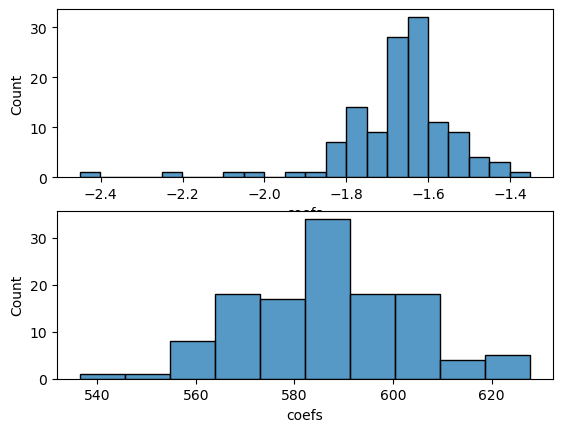

In [ ]:

coefs = dfDistance['coefs'].map(lambda x: eval(x.split(']')[0].split('[')[-1]))
interceps = dfDistance['coefs'].map(lambda x: eval(x.split(']')[-2].split(' ')[-1]))

plot.subplot(211)
sns.histplot(coefs)
plot.subplot(212)
sns.histplot(interceps)

# Criar video

In [ ]:
import cv2

In [ ]:
num_frame = 111
total_frames = len(glob.glob('./results/'+dfDistance['video_file'][0].replace('.avi','')[:20]+'*0.png'))

video=cv2.VideoWriter( dfDistance['video_file'][0].replace('.avi','_depth.mp4')
                      ,cv2.VideoWriter_fourcc(*'MP4V'),6,(2300,1350)) #,fps=15.0)
# (1350, 2300, 3)
# print(video)

for i in range(total_frames):
    num_frame = i+1

    # fix problem ordering 1 and 11 and 111:
    filename = glob.glob('./results/'+dfDistance['video_file'][0].replace('.avi','')[:20]+'*' + str(num_frame) + '.0.png')[0]

    frame = cv2.imread(filename)
    # print(frame.shape )
    # print(cropped_img.shape)

    cropped_img = frame[400:1750, 4200:6500]
    # cv2.imshow('teste',cropped_img)
    # cv2.waitKey()
    # cv2.destroyAllWindows()
    # print(cropped_img.shape)

    video.write(cropped_img)
    print(i+1,"from ", total_frames , end='\r')
video.release()